## LDA bit by bit

[link](https://sebastianraschka.com/Articles/2014_python_lda.html)

The general LDA approach is very similar to a Principal Component Analysis (for more information about the PCA, see the previous article Implementing a Principal Component Analysis (PCA) in Python step by step), but in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally interested in the axes that maximize the separation between multiple classes (LDA).

So, in a nutshell, often the goal of an LDA is to project a feature space (a dataset n-dimensional samples) onto a smaller subspace k (where k≤n−1) while maintaining the class-discriminatory information. 

In general, dimensionality reduction does not only help reducing computational costs for a given classification task, but it can also be helpful to avoid overfitting by minimizing the error in parameter estimation (“curse of dimensionality”).

Both Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) are linear transformation techniques that are commonly used for dimensionality reduction. PCA can be described as an “unsupervised” algorithm, since it “ignores” class labels and its goal is to find the directions (the so-called principal components) that maximize the variance in a dataset. In contrast to PCA, LDA is “supervised” and computes the directions (“linear discriminants”) that will represent the axes that that maximize the separation between multiple classes.

### Iris dataset

For the following tutorial, we will be working with the famous “Iris” dataset that has been deposited on the UCI machine learning repository

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

- Iris-setosa (n=50)
- Iris-versicolor (n=50)
- Iris-virginica (n=50)


The four features of the Iris dataset:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

In [1]:
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

print (feature_dict)

{0: 'sepal length in cm', 1: 'sepal width in cm', 2: 'petal length in cm', 3: 'petal width in cm'}


In [2]:
import pandas as pd

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


X = \begin{bmatrix} x_{1_{\text{sepal length}}} & x_{1_{\text{sepal width}}} & x_{1_{\text{petal length}}} & x_{1_{\text{petal width}}}\\
x_{2_{\text{sepal length}}} & x_{2_{\text{sepal width}}} & x_{2_{\text{petal length}}} & x_{2_{\text{petal width}}}\\
...  \\
x_{150_{\text{sepal length}}} & x_{150_{\text{sepal width}}} & x_{150_{\text{petal length}}} & x_{150_{\text{petal width}}}\\
\end{bmatrix},
 y = \begin{bmatrix} \omega_{\text{setosa}}\\
\omega_{\text{setosa}}\\
...  \\
\omega_{\text{virginica}}\end{bmatrix}

Since it is more convenient to work with numerical values, we will use the LabelEncode from the scikit-learn library to convert the class labels into numbers: 1, 2, and 3.



In [3]:
from sklearn.preprocessing import LabelEncoder

#creating feature matrix
X = df.iloc[:,0:4].values

# creating target matrix
y = df['class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

print (X[:5])
print (y[:5])

print (len(X))

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
[1 1 1 1 1]
150


Just to get a rough idea how the samples of our three classes ω1, ω2 and ω3 are distributed, let us visualize the distributions of the four different features in 1-dimensional histograms.

/home/shaunak/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


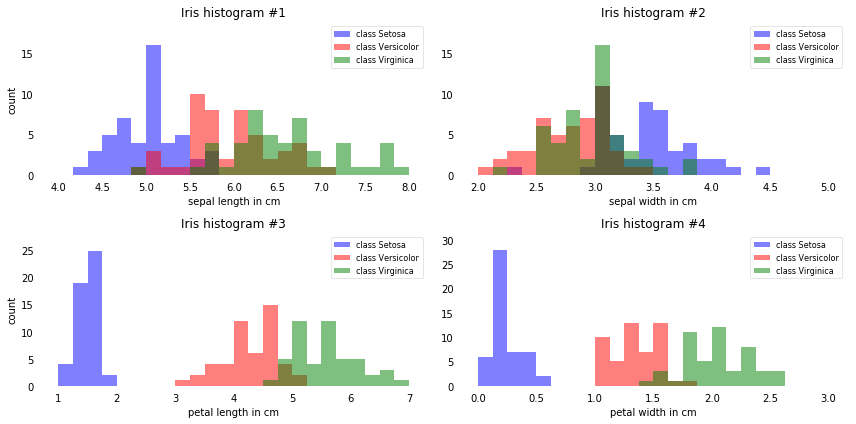

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

From just looking at these simple graphical representations of the features, we can already tell that the petal lengths and widths are likely better suited as potential features two separate between the three flower classes. In practice, instead of reducing the dimensionality via a projection (here: LDA), a good alternative would be a feature selection technique. For low-dimensional datasets like Iris, a glance at those histograms would already be very informative

It should be mentioned that LDA assumes normal distributed data, features that are statistically independent, and identical covariance matrices for every class. However, this only applies for LDA as classifier and LDA for dimensionality reduction can also work reasonably well if those assumptions are violated. And even for classification tasks LDA seems can be quite robust to the distribution of the data:



### Computing the d-dimensional mean vectors

In this first step, we will start off with a simple computation of the mean vectors mmi, (i=1,2,3) of the 3 different flower classes:

 m_i = \begin{bmatrix}
\mu_{\omega_i (\text{sepal length)}}\\
\mu_{\omega_i (\text{sepal width})}\\
\mu_{\omega_i (\text{petal length)}}\\
\mu_{\omega_i (\text{petal width})}\\
\end{bmatrix} for i = 1,2,3

In [5]:
mean_vectors = []

for class_index in range(1, 4):

    mean_vectors.append(np.mean(X[y == class_index], axis=0))
    print('Mean Vector class %s: %s\n' %(class_index, mean_vectors[class_index-1]))

Mean Vector class 1: [ 5.006  3.418  1.464  0.244]

Mean Vector class 2: [ 5.936  2.77   4.26   1.326]

Mean Vector class 3: [ 6.588  2.974  5.552  2.026]



### Computing the Scatter Matrices

Now, we will compute the two 4x4-dimensional matrices: The within-class and the between-class scatter matrix.

#### Within-class scatter matrix SW

The within-class scatter matrix SW is computed by the following equation:

$$S_W = \sum\limits_{i=1}^{c}  S_i$$

where

$$S_i = \sum\limits_{\pmb x \in D_i}^n (\pmb x - \pmb m_i)\;(\pmb x - \pmb m_i)^T$$

(scatter matrix for every class)


and m_i is the mean vector 



In [6]:
S_W = np.zeros((4,4))

for class_index in range(1, 4):
    class_sc_mat = np.zeros((4, 4))
    for row in X[y == class_index]:
        #print ( (row - mean_vectors[class_index -1 ]).reshape(1, 4) )
        class_sc_mat += (row - mean_vectors[class_index -1 ]).reshape(4, 1).dot((row - mean_vectors[class_index -1 ]).reshape(1, 4)) 
    S_W += class_sc_mat
    
print('within-class Scatter Matrix:\n', S_W)


within-class Scatter Matrix:
 [[ 38.9562  13.683   24.614    5.6556]
 [ 13.683   17.035    8.12     4.9132]
 [ 24.614    8.12    27.22     6.2536]
 [  5.6556   4.9132   6.2536   6.1756]]


#### Between-class scatter matrix SB


between-class scatter matrix SB is computed by the following equation:

$$S_B =  \sum\limits_{i=1}^{c} N_{i} (\pmb m_i - \pmb m) (\pmb m_i - \pmb m)^T$$

m  is the overall mean, and mi and Ni are the sample mean and sizes of the respective classes.

In [7]:
overall_mean = np.mean(X, axis=0) # axis = 0 means means along cols

S_B = np.zeros((4,4))

for class_index in range(3):
    N_i = len(X[y == class_index+1])
    first_term = mean_vectors[class_index].reshape(4,1) - overall_mean.reshape(4,1)
    second_term = (mean_vectors[class_index].reshape(4,1) - overall_mean.reshape(4,1)).T
    S_B += N_i * first_term.dot(second_term)
    
print (S_B)

[[  63.21213333  -19.534       165.16466667   71.36306667]
 [ -19.534        10.9776      -56.0552      -22.4924    ]
 [ 165.16466667  -56.0552      436.64373333  186.90813333]
 [  71.36306667  -22.4924      186.90813333   80.60413333]]


### Solving the generalized eigenvalue problem for the matrix S−1WSB



In [27]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

print (eig_vals)

print (eig_vecs)

# note: eigen vectors will be along the columns

[  3.22719578e+01   2.77566864e-01   3.42245892e-15   1.14833623e-14]
[[-0.20490976 -0.00898234 -0.8843662  -0.22342193]
 [-0.38714331 -0.58899857  0.28544073 -0.25229799]
 [ 0.54648218  0.25428655  0.2580474  -0.32596888]
 [ 0.71378517 -0.76703217  0.26425659  0.88327383]]


If we are performing the LDA for dimensionality reduction, the eigenvectors are important since they will form the new axes of our new feature subspace; the associated eigenvalues are of particular interest since they will tell us how “informative” the new “axes” are.

Eigen vectors dont get knocked off their span. So they are good choce for axes

###  Cross check

In [34]:
eig_vecs[:, 3]

array([-0.22342193, -0.25229799, -0.32596888,  0.88327383])

In [51]:
A = np.linalg.inv(S_W).dot(S_B)

for i in range(4):
    v = eig_vecs[:, i]
    lambda_val = float(eig_vals[i])
    lhs = A.dot(v.reshape(4,1)).reshape(1, 4)
    rhs = lambda_val * v
    print (lhs[0], rhs)

[ -6.61283911 -12.49387258  17.63604981  23.03524504] [ -6.61283911 -12.49387258  17.63604981  23.03524504]
[-0.0024932  -0.16348649  0.07058152 -0.21290271] [-0.0024932  -0.16348649  0.07058152 -0.21290271]
[ -8.88178420e-16  -3.55271368e-15   5.32907052e-15   5.32907052e-15] [ -3.02670700e-15   9.76909182e-16   8.83156631e-16   9.04407321e-16]
[  1.49880108e-15   4.21884749e-15  -4.44089210e-15   1.02140518e-14] [ -2.56563491e-15  -2.89722925e-15  -3.74321875e-15   1.01429534e-14]


### 4.1. Sorting the eigenvectors by decreasing eigenvalues

Remember from the introduction that we are not only interested in merely projecting the data into a subspace that improves the class separability, but also reduces the dimensionality of our feature space, (where the eigenvectors will form the axes of this new feature subspace).

However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1.

So, in order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. Roughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.
The common approach is to rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top k eigenvectors.

In [29]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

eig_pairs

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i)

Eigenvalues in decreasing order:

(32.271957799729812, array([-0.20490976, -0.38714331,  0.54648218,  0.71378517]))
(0.27756686384003953, array([-0.00898234, -0.58899857,  0.25428655, -0.76703217]))
(1.1483362279322388e-14, array([-0.22342193, -0.25229799, -0.32596888,  0.88327383]))
(3.4224589208497691e-15, array([-0.8843662 ,  0.28544073,  0.2580474 ,  0.26425659]))



If we take a look at the eigenvalues, we can already see that 2 eigenvalues are close to 0. The reason why these are close to 0 is not that they are not informative but it’s due to floating-point imprecision. In fact, these two last eigenvalues should be exactly zero: In LDA, the number of linear discriminants is at most c−1 where c is the number of class labels, since the in-between scatter matrix SB is the sum of c matrices with rank 1 or less. Note that in the rare case of perfect collinearity (all aligned sample points fall on a straight line), the covariance matrix would have rank one, which would result in only one eigenvector with a nonzero eigenvalue.

Now, let’s express the “explained variance” as percentage:



In [30]:
eig_val_sum = sum(eig_vals)

index = 1
for eig_val in eig_vals:
    print ('eigenvalue {0:}: {1:.2%}'.format(index, (eig_val/eig_val_sum).real))
    index += 1


eigenvalue 1: 99.15%
eigenvalue 2: 0.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


**The first eigenpair is by far the most informative one, and we won’t loose much information if we would form a 1D-feature spaced based on this eigenpair.**

### Choosing k eigenvectors with the largest eigenvalues

After sorting the eigenpairs by decreasing eigenvalues, it is now time to construct our k×d-dimensional eigenvector matrix WW (here 4×2: based on the 2 most informative eigenpairs) and thereby reducing the initial 4-dimensional feature space into a 2-dimensional feature subspace.

In [12]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.20490976 -0.00898234]
 [-0.38714331 -0.58899857]
 [ 0.54648218  0.25428655]
 [ 0.71378517 -0.76703217]]


### Transforming the samples onto the new subspace

In the last step, we use the 4×2-dimensional matrix W that we just computed to transform our samples onto the new subspace via the equation

Y=X.W

(where X is a n×d-dimensional matrix representing the n samples, and Y are the transformed n×k-dimensional samples in the new subspace).

In [13]:
X_lda = X.dot(W)

X_lda.shape

(150, 2)

/home/shaunak/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


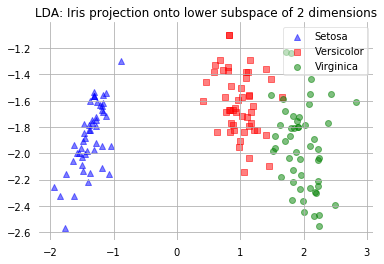

In [66]:
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        
        # basically we are plotting 2nd col vs 1st col acc to class
        plt.scatter(x=X_lda[y==label][:, 0],
                y=X_lda[y==label][:, 1],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    
    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto lower subspace of 2 dimensions')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

In [15]:
X_lda[:,0].real[y == 1]

X_lda[y==1][:, 0]

array([-1.49220928, -1.25765567, -1.3487506 , -1.18024885, -1.51043263,
       -1.40183784, -1.27966155, -1.37835575, -1.11648646, -1.3131003 ,
       -1.57646265, -1.28272558, -1.30854321, -1.37003298, -1.9385142 ,
       -1.76617886, -1.62043071, -1.42083076, -1.49597495, -1.48232553,
       -1.35102322, -1.37223268, -1.6470616 , -1.03670041, -1.11878093,
       -1.16885021, -1.1809505 , -1.45805203, -1.47398592, -1.18480594,
       -1.16658259, -1.31756262, -1.76171654, -1.8451735 , -1.3131003 ,
       -1.46487174, -1.6288214 , -1.3131003 , -1.20984901, -1.39884673,
       -1.454988  , -0.88796115, -1.28727767, -1.07690779, -1.19235414,
       -1.16578618, -1.49905583, -1.2736114 , -1.55597167, -1.39428964])

In [16]:
np.linalg.norm((eig_pairs[1][1]))

1.0

### Choosing 1 eigen vector

In [17]:
chosen_eigen_vector = eig_pairs[0][1]

w_new = chosen_eigen_vector.reshape(4,1)

w_new

array([[-0.20490976],
       [-0.38714331],
       [ 0.54648218],
       [ 0.71378517]])

In [18]:
Y_reduced = X.dot(w_new)

Y_reduced.shape

(150, 1)

In [63]:
Y_reduced

array([[-1.49220928],
       [-1.25765567],
       [-1.3487506 ],
       [-1.18024885],
       [-1.51043263],
       [-1.40183784],
       [-1.27966155],
       [-1.37835575],
       [-1.11648646],
       [-1.3131003 ],
       [-1.57646265],
       [-1.28272558],
       [-1.30854321],
       [-1.37003298],
       [-1.9385142 ],
       [-1.76617886],
       [-1.62043071],
       [-1.42083076],
       [-1.49597495],
       [-1.48232553],
       [-1.35102322],
       [-1.37223268],
       [-1.6470616 ],
       [-1.03670041],
       [-1.11878093],
       [-1.16885021],
       [-1.1809505 ],
       [-1.45805203],
       [-1.47398592],
       [-1.18480594],
       [-1.16658259],
       [-1.31756262],
       [-1.76171654],
       [-1.8451735 ],
       [-1.3131003 ],
       [-1.46487174],
       [-1.6288214 ],
       [-1.3131003 ],
       [-1.20984901],
       [-1.39884673],
       [-1.454988  ],
       [-0.88796115],
       [-1.28727767],
       [-1.07690779],
       [-1.19235414],
       [-1

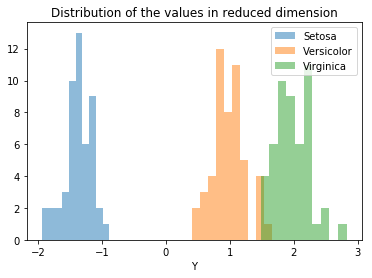

In [64]:
plt.hist(Y_reduced[y == 1], alpha =0.5,label="Setosa") 
plt.hist(Y_reduced[y == 2], alpha =0.5,label="Versicolor") 
plt.hist(Y_reduced[y == 3], alpha =0.5,label="Virginica") 
plt.title("Distribution of the values in reduced dimension")
plt.xlabel("Y")
plt.legend(prop={'size': 10})

### Bias term added

In [67]:
w_new2 = w_new + 10

print (w_new2)

Y_reduced2 = X.dot(w_new2)

[[  9.79509024]
 [  9.61285669]
 [ 10.54648218]
 [ 10.71378517]]


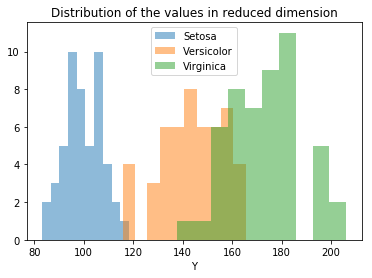

In [71]:
plt.hist(Y_reduced2[y == 1], alpha =0.5, label="Setosa") 
plt.hist(Y_reduced2[y == 2], alpha =0.5, label="Versicolor") 
plt.hist(Y_reduced2[y == 3], alpha =0.5, label="Virginica") 
plt.title("Distribution of the values in reduced dimension")
plt.xlabel("Y")
plt.legend()